In [174]:
import torch
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

In [175]:
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon * sign_data_grad
    
    # Clip the perturbed image values to ensure they stay within the valid range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    
    return perturbed_image

In [176]:
model = models.squeezenet1_0(pretrained=True)

In [177]:
input_image = "./content/dog.png"  # Provide the path to your input image
image = Image.open(input_image).convert("RGB")  # Convert image to RGB format
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
processed_image = preprocess(image).unsqueeze(0)

In [178]:
output = model(processed_image)
predicted_label = torch.argmax(output, 1).item()
print(f'Predicted Label: {predicted_label}')


Predicted Label: 235


In [179]:
processed_image.requires_grad = True

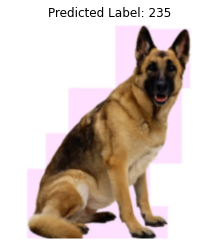

In [180]:
output = model(processed_image)
predicted_label = torch.argmax(output, 1).item()

# Plot the original image
plt.figure()
plt.imshow(image)
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

In [181]:
true_label = torch.tensor([235])  # The true label for a dog class (235 for Rottweiler)
loss = torch.nn.CrossEntropyLoss()(output, true_label)

In [182]:
model.zero_grad()
loss.backward()
data_grad = processed_image.grad.data

In [183]:
epsilon = 0.025  # Adjust this value to control the strength of the attack
perturbed_image = fgsm_attack(processed_image, epsilon, data_grad)

In [184]:
output = model(perturbed_image)
new_predicted_label = torch.argmax(output, 1).item()


In [185]:
image_np = np.transpose(processed_image.squeeze().detach().numpy(), (1, 2, 0))
perturbed_image_np = np.transpose(perturbed_image.squeeze().detach().numpy(), (1, 2, 0))

In [186]:
def show_image_label(image, label):
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


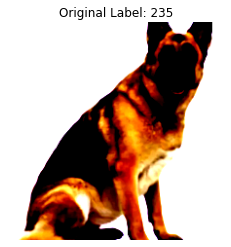

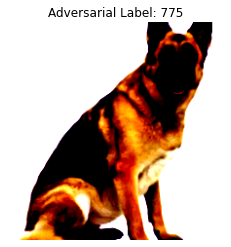

In [187]:
show_image_label(image_np, f"Original Label: {predicted_label}")
show_image_label(perturbed_image_np, f"Adversarial Label: {new_predicted_label}") #285 for Siamese_cat